In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Prob 1

## (i)

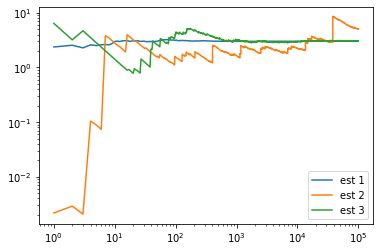

In [2]:
pi = st.multivariate_normal(mean=[2, 2])
g = lambda s0: st.multivariate_normal(mean=[0, 0], cov=s0**2)
f = lambda x: np.sqrt((x**2).sum(axis=1))

n = 100000
x1 = pi.rvs(n)
fx1 = f(x1)
est1 = np.cumsum(fx1) / np.arange(1, n + 1)
x2 = g(1).rvs(n)
fwx2 = f(x2) * pi.pdf(x2) / g(1).pdf(x2)
est2 = np.cumsum(fwx2) / np.arange(1, n + 1)
x3 = g(4).rvs(n)
fwx3 = f(x3) * pi.pdf(x3) / g(4).pdf(x3)
est3 = np.cumsum(fwx3) / np.arange(1, n + 1)

plt.loglog(np.arange(1, n + 1), est1, label='est 1')
plt.loglog(np.arange(1, n + 1), est2, label='est 2')
plt.loglog(np.arange(1, n + 1), est3, label='est 3')
plt.legend()
plt.show()

## (ii)

In [3]:
print(1 / (1 + np.var(pi.pdf(x2) / g(1).pdf(x2)) 
           / (pi.pdf(x2) / g(1).pdf(x2)).mean() ** 2))
print(1 / (1 + np.var(pi.pdf(x3) / g(4).pdf(x3)) 
           / (pi.pdf(x3) / g(4).pdf(x3)).mean() ** 2))

0.00010932906332760437
0.09395950294725941


# Prob 2

## 1

In [4]:
class SAW:
    def __init__(self, n=10, 
                 ps = np.array([0.04, 0.24, 0.24, 0.24, 0.24])):
        self.n = n
        self.ps = ps
        
    def compare(self, olds, new):
        olds = olds[:, 0] * (self.n + 1) + olds[:, 1]
        new = new[0] * (self.n + 1) + new[1]
        return any(olds == new)
    
    def walk(self, pos, a):
        new = pos.copy()
        if a == 1:
            new[1] += 1
        elif a == 2:
            new[1] -= 1
        elif a == 3:
            new[0] -= 1
        elif a == 4:
            new[0] += 1
            
        return new
    
    def test(self, path):
        choice = [0]
        for a in np.arange(1, 5):
            new = self.walk(path[-1], a)
            border = any(new < 0) or any(new > self.n)
            if not (border or self.compare(path[:-1], new)):
                choice.append(a)
                
        return choice
    
    def simulate(self):
        path = np.array([[0, 0]])
        flag = True
        w = 1
        while flag:
            choice = self.test(path)
            ps = self.ps[choice] / self.ps[choice].sum()
            a = np.random.choice(choice, p=ps)
            w /= ps[choice == a][0]
            if a == 0:
                flag = False
            else:
                path = np.vstack([path, self.walk(path[-1], a)])
            
        return path, w

1.2431652691821522e+25


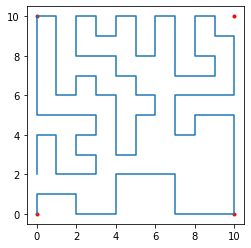

102 3.469117138604462e+24


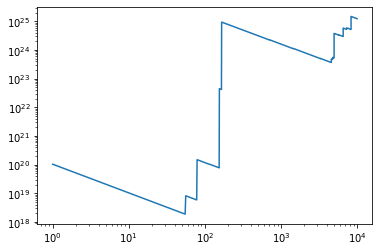

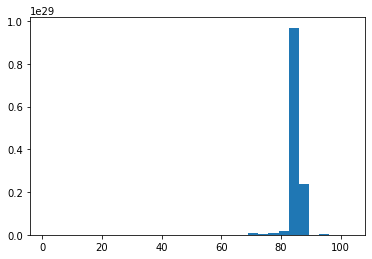

In [5]:
n = 10
M = 10000
ps = np.array([1, 100, 40, 40, 100])
saw = SAW(n=n, ps=ps / ps.sum())

Path = []
Len = []
W = []
for m in range(M):
    path, w = saw.simulate()
    Path.append(path)
    Len.append(path.shape[0])
    W.append(w)

print(np.mean(W))

path = Path[Len.index(max(Len))]
w = W[Len.index(max(Len))]
cx = [0, 0, saw.n, saw.n]
cy = [0, saw.n, saw.n, 0]
plt.plot(cx, cy, 'r.')
plt.plot(path[:, 0], path[:, 1])
plt.axis('scaled')
plt.show()
print(path.shape[0] - 1, w)

means = np.cumsum(W) / np.arange(1, M + 1)
plt.loglog(np.arange(1, M + 1), means)
plt.show()

plt.hist(Len, weights=W, bins=30)
plt.show()

## 2

3.0979652477334507e+20


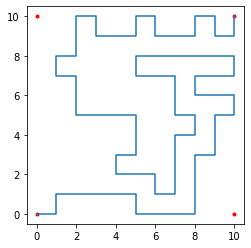

72 3.07824304689941e+24


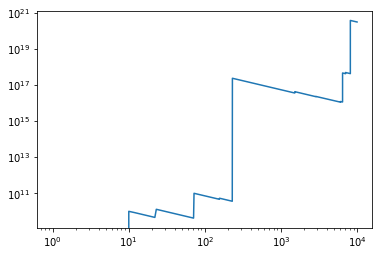

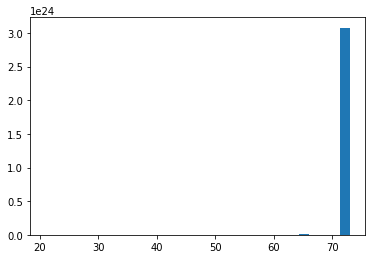

In [6]:
n = 10
M = 10000
ps = np.array([1, 1000, 400, 400, 1000])
saw = SAW(n=n, ps=ps / ps.sum())

Path = []
Len = []
W = []
for m in range(M):
    path, w = saw.simulate()
    Path.append(path)
    if all(path[-1] == np.array([saw.n, saw.n])):
        Len.append(path.shape[0])
        W.append(w)
    else:
        Len.append(0)
        W.append(0)

print(np.mean(W))

path = Path[Len.index(max(Len))]
w = W[Len.index(max(Len))]
cx = [0, 0, saw.n, saw.n]
cy = [0, saw.n, saw.n, 0]
plt.plot(cx, cy, 'r.')
plt.plot(path[:, 0], path[:, 1])
plt.axis('scaled')
plt.show()
print(path.shape[0] - 1, w)

means = np.cumsum(W) / np.arange(1, M + 1)
plt.loglog(np.arange(1, M + 1), means)
plt.show()

Len = np.array(Len)
plt.hist(Len[Len != 0], weights=np.array(W)[Len != 0], bins=30)
plt.show()